In [1]:
#imports and mounting google drive for use

import pandas as pd # Used for loading and manipulating data
import numpy as np # Numerical Python = used for computations
from matplotlib import pyplot as plt # Used for graphing

#imports for predictions

from sklearn.linear_model import LinearRegression # Used for linear regression modeling
from sklearn.linear_model import LogisticRegression # Used for logistic regression modeling

from sklearn.metrics import r2_score # Used for R^2
from sklearn.metrics import mean_squared_error #Used for mean Squared Error
from sklearn.metrics import confusion_matrix #confusion matrix import

from sklearn.model_selection import train_test_split # train test split modeling


from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/MATH 3439 - Spring 2023/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Cleaning

In [2]:
#reading in spotify csv and saving to spotify dataframe
spotify_df = pd.read_csv('/content/drive/Shareddrives/MATH 3439 - Spring 2023/data/spotify_tracks.csv')
print('Number of rows: ' + str(len(spotify_df)))

Number of rows: 170653


In [3]:
spotify_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
spotify_df = spotify_df.drop(columns=['artists', 'id', 'name', 'release_date'])
# spotify_df = spotify_df.drop(columns=['artists', 'id', 'name')

In [5]:
#changing duration in ms to duration in seconds
spotify_df['duration_s'] = spotify_df['duration_ms'] / 1000

#Additional methods/Extra Code


In [6]:
#helper function to print the max, min, median, mean value for a column in a dataframe
def print_info(df, column):
  print('The max value for '+ column + ' is : ' + str(df[column].max()))
  print('The min value for '+ column + ' is : ' + str((df[column].min())))
  print('The median value for '+ column + ' is : ' + str((df[column].median())))
  print('The mean value for '+ column + ' is : ' + str((df[column].mean())))


In [7]:
# Helper function for drawing lines from slope and intercept
def abline(slope, intercept, **kwargs):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', **kwargs)

In [8]:
# Helper functions to print linear regression coef/intercept and plotting a scatter plot based on predictions
def summarize_model(lr, X, y):
  # Coefficients
  print('Coefs: ' + str(lr.coef_))
  print('Intercept: ' + str(lr.intercept_))

  # Predictions
  preds = lr.predict(X)

  plt.figure(figsize=(12,8))

  # Scatter plot
  plt.scatter(y, preds)
  abline(1, 0, color='red')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')

  plt.title('R^2 = ' + str(r2_score( y, preds)) + ' \n MSE = ' + str(mean_squared_error(y, preds)))

  return(preds)

In [9]:
#borrowed
def lrFit(df, X_cols, y_col):
  #Split data
  train_df, test_df = train_test_split(df, test_size=0.3)
  X_train = train_df[X_cols]
  y_train = train_df[y_col]
  X_test = test_df[X_cols]
  y_test = test_df[y_col]

  #Fit linear Reg + predictions
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  test_pred = lr.predict(X_test)

  #Scatter plot
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, test_pred)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')

  mse = mean_squared_error(y_test, test_pred)
  #coefs
  print(f'Coefficients: {lr.coef_}')
  #intercept
  print(f'Intercept: {lr.intercept_}')
  #MSE
  print(f'MSE: {mse}')
  #R^2
  r2 = r2_score(y_test, test_pred)
  print(f'R^2 score = {r2}')
  plt.title(f'MSE: {mse:.2f}   R^2 score = {r2:.2f}')

#Data exploration: Overall

In [10]:
#printing number of rows in spotify dataframe
print('Number of rows: ' + str(len(spotify_df)))

#printing column names in spotify dataframe
print('Column names' + str(spotify_df.columns))

Number of rows: 170653
Column namesIndex(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo', 'duration_s'],
      dtype='object')


In [11]:
#printing out the number of missing values in every column in spotify dataframe
for col in spotify_df.columns:
    print(f'{col}: {spotify_df[col].isna().sum()} ({100 * spotify_df[col].isna().sum() / spotify_df.shape[0]}%)')

valence: 0 (0.0%)
year: 0 (0.0%)
acousticness: 0 (0.0%)
danceability: 0 (0.0%)
duration_ms: 0 (0.0%)
energy: 0 (0.0%)
explicit: 0 (0.0%)
instrumentalness: 0 (0.0%)
key: 0 (0.0%)
liveness: 0 (0.0%)
loudness: 0 (0.0%)
mode: 0 (0.0%)
popularity: 0 (0.0%)
speechiness: 0 (0.0%)
tempo: 0 (0.0%)
duration_s: 0 (0.0%)


In [12]:
#looking at the datatypes for all columns in spotify_df
spotify_df.dtypes

valence             float64
year                  int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
popularity            int64
speechiness         float64
tempo               float64
duration_s          float64
dtype: object

###Data Exploration: Popularity

popularity (integer) : how popular a track is

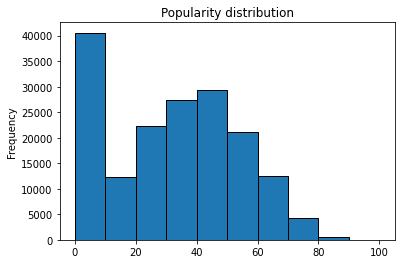

In [13]:
spotify_df['popularity'].plot(kind='hist', edgecolor='black', title='Popularity distribution')

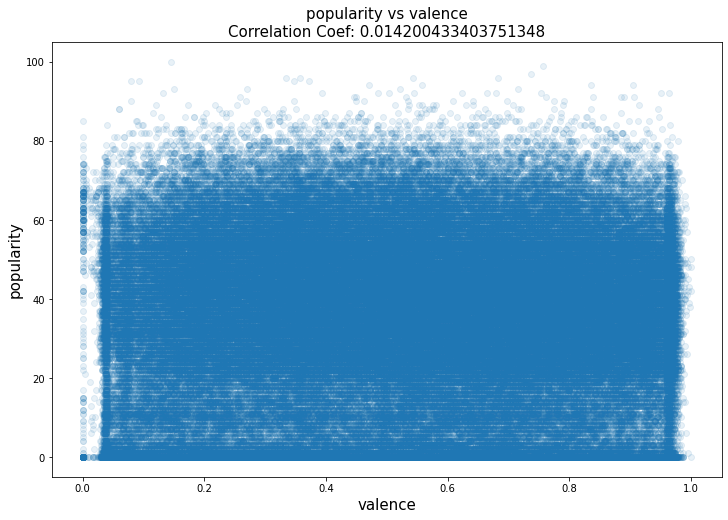

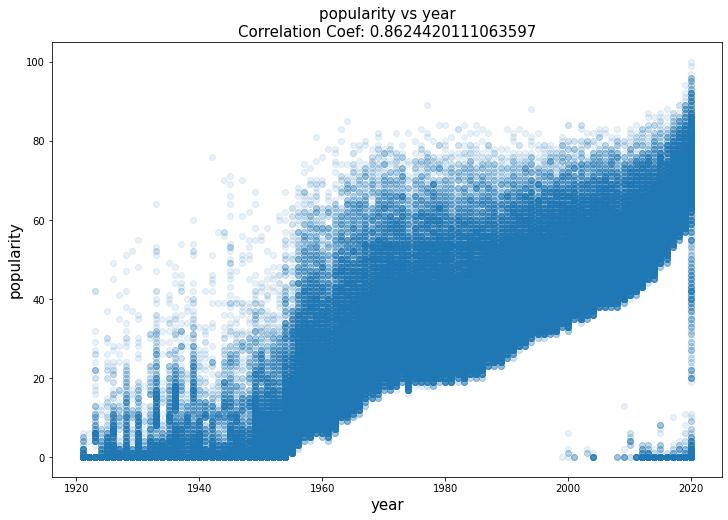

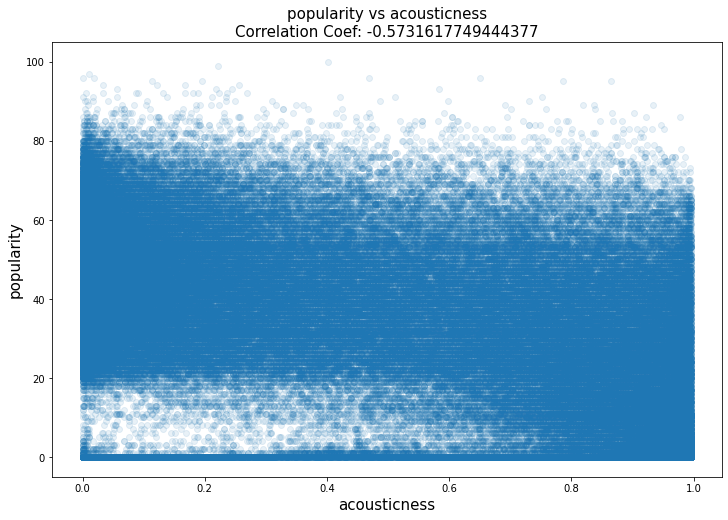

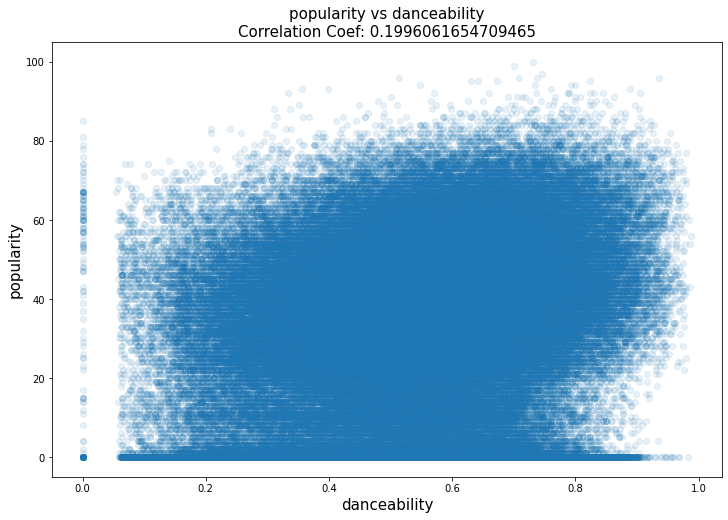

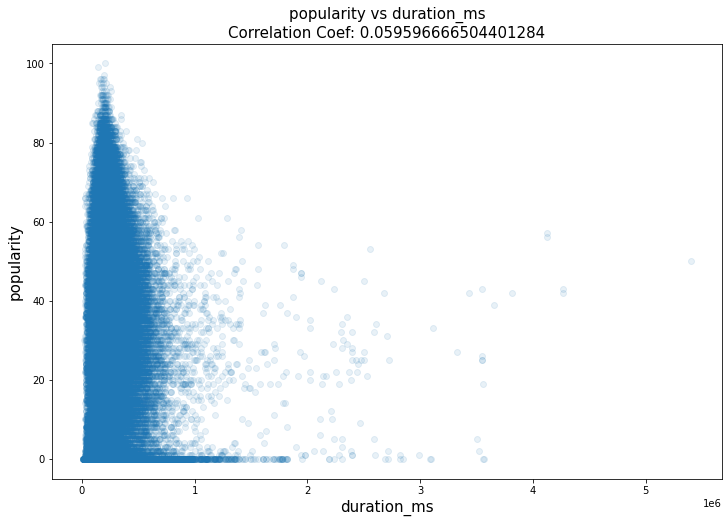

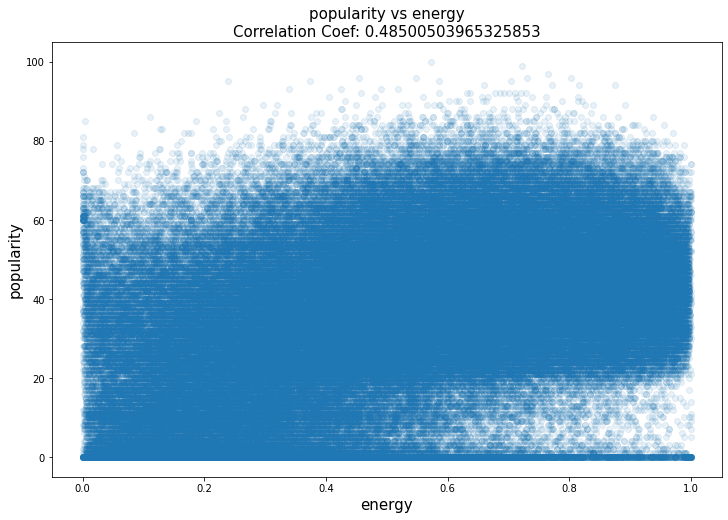

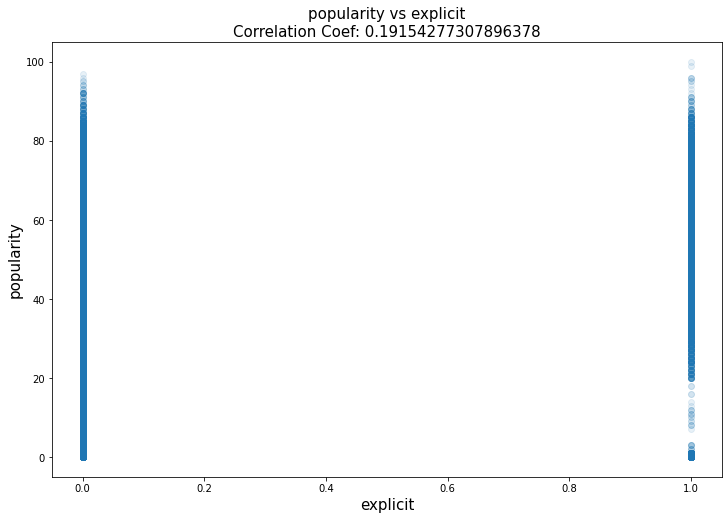

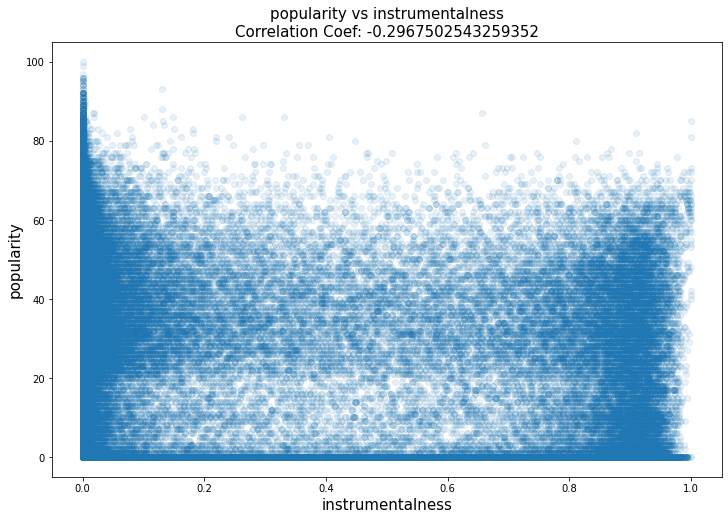

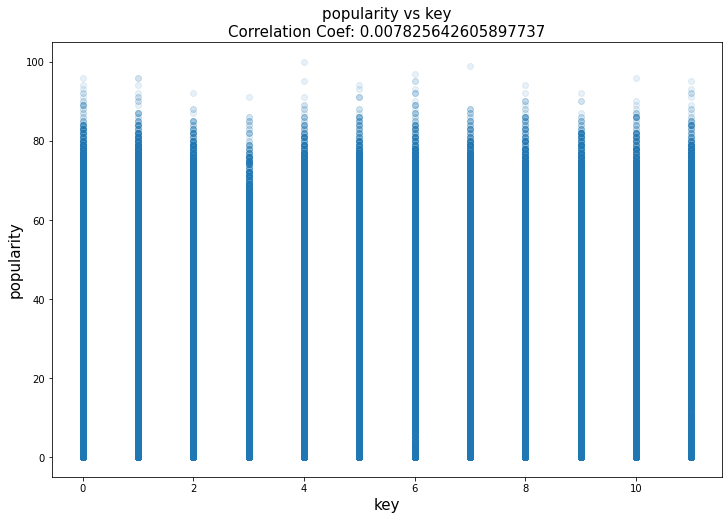

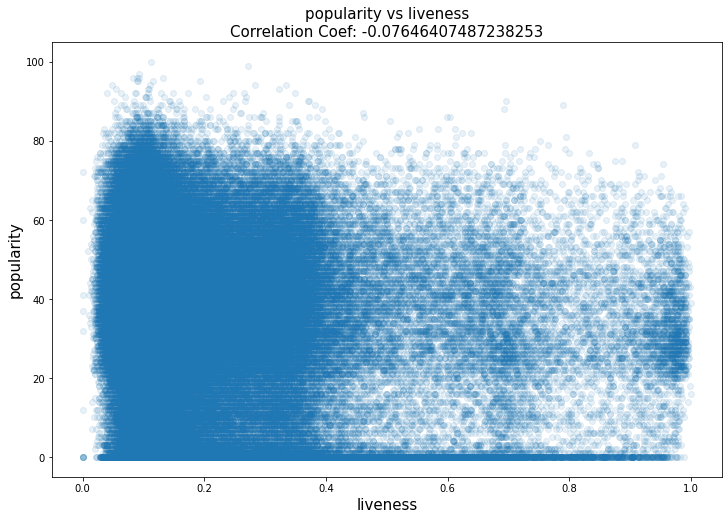

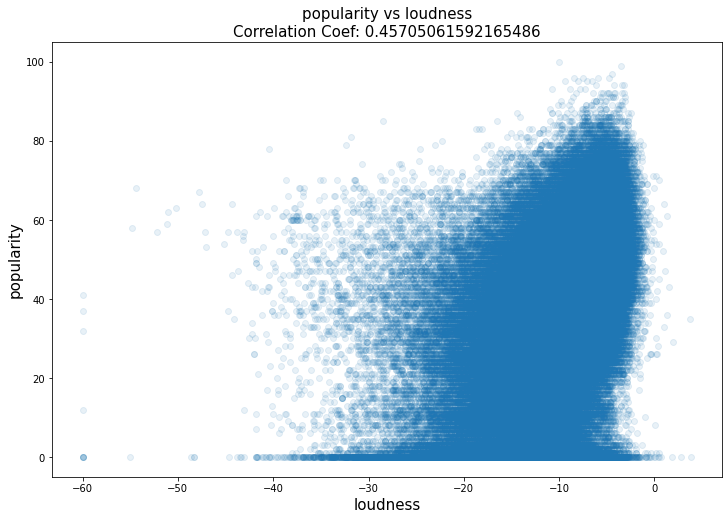

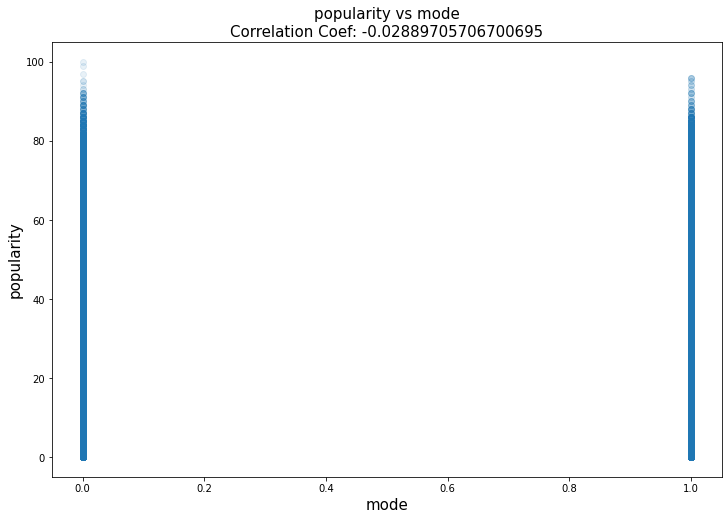

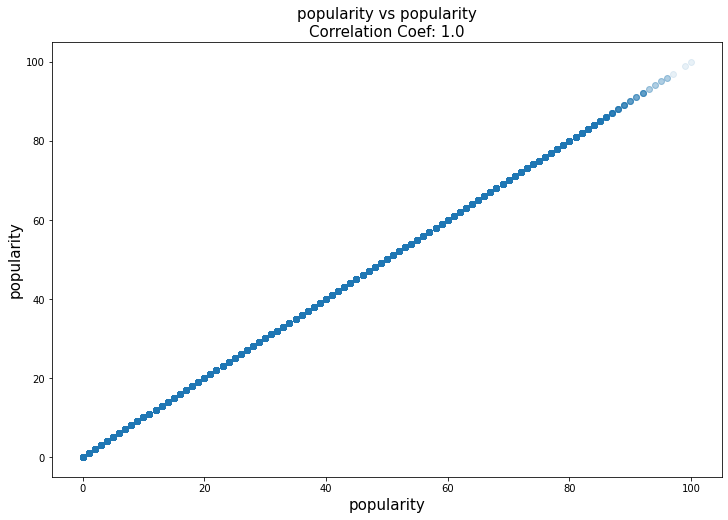

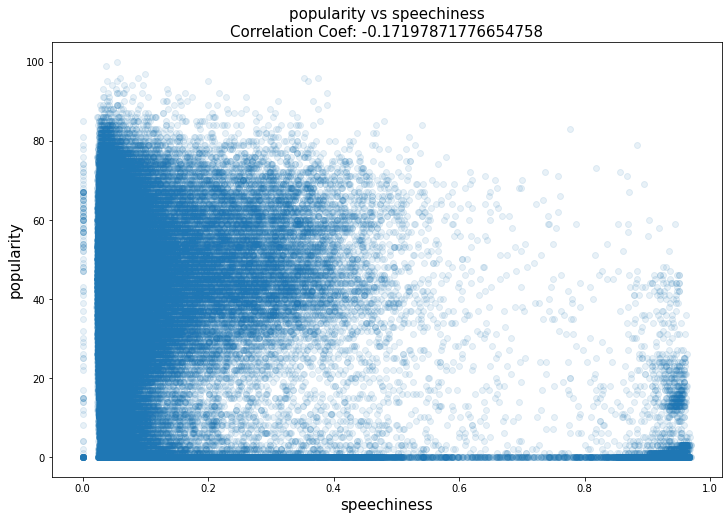

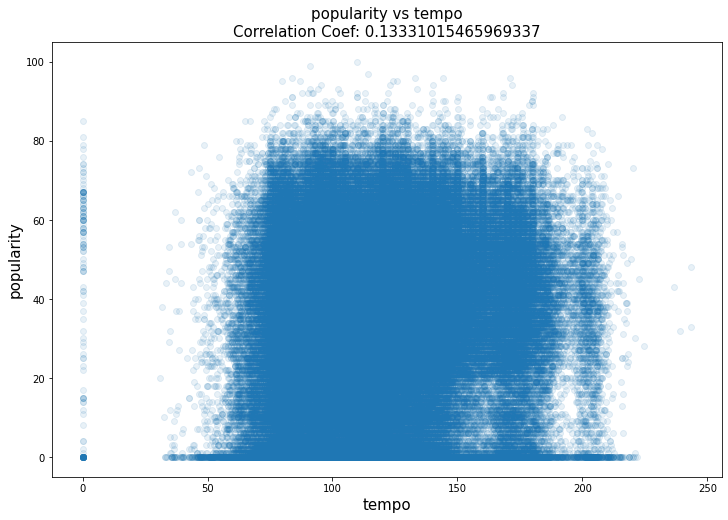

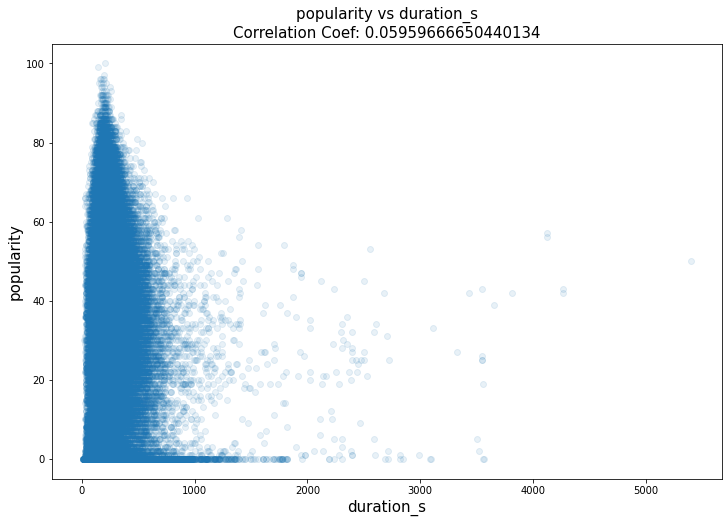

In [14]:
for i in spotify_df.columns:
  plt.figure(figsize=(12, 8))
  plt.scatter(y=spotify_df['popularity'], x=spotify_df[i], alpha=0.1)
  plt.ylabel('popularity', fontdict={'fontsize': 15})
  plt.xlabel(str(i), fontdict={'fontsize': 15})
  corr = spotify_df[i].corr(spotify_df['popularity'])
  plt.title('popularity vs ' + str(i) + '\n' + "Correlation Coef: " + str(corr), fontdict={'fontsize': 15})
  plt.yticks(fontsize = 10)
  plt.xticks(fontsize = 10)

In [15]:
spotify_df['popularity']

0          4
1          5
2          5
3          3
4          2
          ..
170648    72
170649    68
170650    76
170651    70
170652    74
Name: popularity, Length: 170653, dtype: int64

In [16]:
print_info(spotify_df, 'popularity')

The max value for popularity is : 100
The min value for popularity is : 0
The median value for popularity is : 33.0
The mean value for popularity is : 31.431794342906365


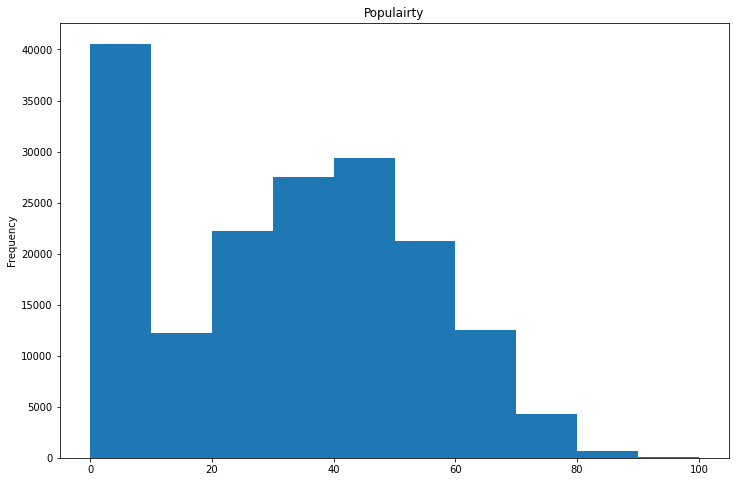

In [17]:
#ploting popularity in a histogram
spotify_df['popularity'].plot(kind='hist',
                                    figsize=(12,8),
                                    title="Populairty",
                                    xlabel="Popularity",
                                    ylabel = "Count of Occurences")

###Data Exploration: Tempo

tempo (number(float)) : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [18]:
spotify_df['tempo']

0          80.954
1          60.936
2         110.339
3         100.109
4         101.665
           ...   
170648    105.029
170649    137.936
170650     91.688
170651     75.055
170652     94.991
Name: tempo, Length: 170653, dtype: float64

In [19]:
print_info(spotify_df, 'tempo')

The max value for tempo is : 243.507
The min value for tempo is : 0.0
The median value for tempo is : 114.729
The mean value for tempo is : 116.86158961752797


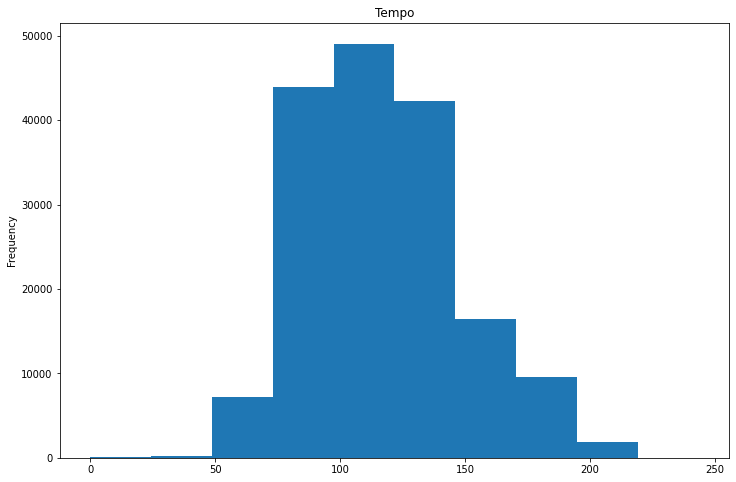

In [20]:
#ploting tempo in a histogram
spotify_df['tempo'].plot(kind='hist',
                                    figsize=(12,8),
                                    title="Tempo",
                                    xlabel="tempo",
                                    ylabel = "Count of Occurences")

###Data Exploration: Duration

duration_ms (integer) : The duration of the track in milliseconds.

In [21]:
# spotify_df['duration_ms']

spotify_df['duration_s']

0         831.667
1         180.533
2         500.062
3         210.000
4         166.693
           ...   
170648    301.714
170649    150.654
170650    211.280
170651    337.147
170652    189.507
Name: duration_s, Length: 170653, dtype: float64

In [22]:
print_info(spotify_df, 'duration_s')

The max value for duration_s is : 5403.5
The min value for duration_s is : 5.108
The median value for duration_s is : 207.467
The mean value for duration_s is : 230.94831066550253


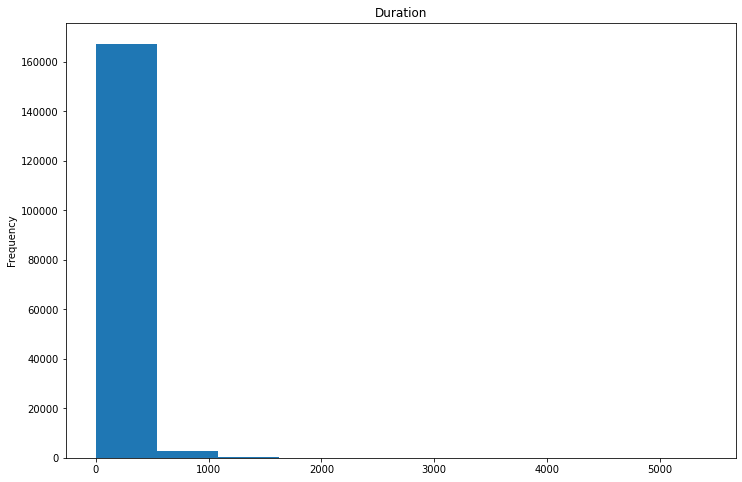

In [23]:
#ploting track duration in a histogram
spotify_df['duration_s'].plot(kind='hist',
                                    figsize=(12,8),
                                    title="Duration",
                                    xlabel="Duration in seconds",
                                    ylabel = "Count of Occurences")

###Data Exploration: Key/Time Signature

key (integer) : The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

(>= -1   <= 11)


In [24]:
spotify_df['key']

0         10
1          7
2          3
3          5
4          3
          ..
170648     7
170649     7
170650     4
170651     2
170652     7
Name: key, Length: 170653, dtype: int64

In [25]:
print_info(spotify_df, 'key')

The max value for key is : 11
The min value for key is : 0
The median value for key is : 5.0
The mean value for key is : 5.199844128143074


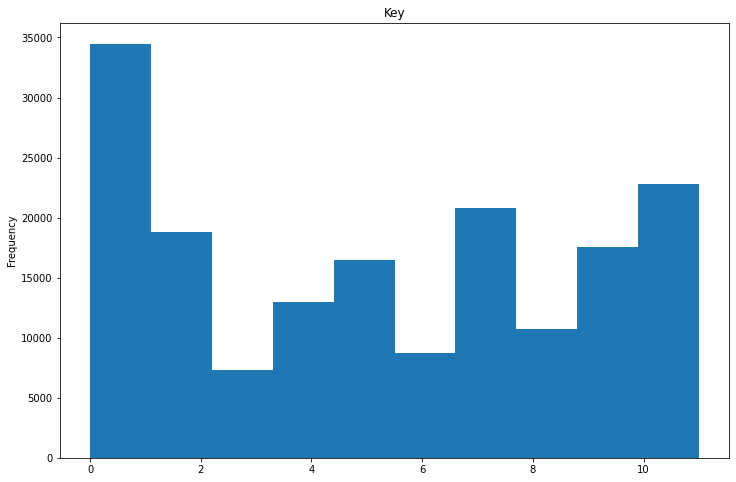

In [26]:
#ploting popularity in a histogram
spotify_df['key'].plot(kind='hist',
                                    figsize=(12,8),
                                    title="Key",
                                    xlabel="Key",
                                    ylabel = "Count of Occurences")

#Predictions

###Linear regression modeling

Coefficients: [ 5.13270881e-01  6.69507454e-01 -4.29647464e+00  2.91336706e+00
 -3.84776246e-07 -1.78440085e+00 -4.05800851e+00  3.43224534e-03
 -2.94134159e+00  2.31264485e-02 -7.07764099e+00  1.29850994e-03]
Intercept: -1288.688251616915
MSE: 116.42201147560485
R^2 score = 0.7556257177880762


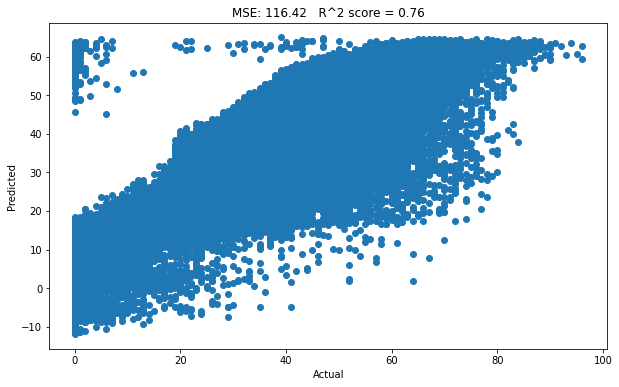

In [27]:
#baseline model
X_cols = spotify_df.drop(columns='popularity')
X = ['valence', 'year', 'acousticness' , 'danceability' , 'duration_ms' , 'energy' , 'instrumentalness' , 'key' , 'liveness' , 'loudness' , 'speechiness' , 'tempo']

lrFit(spotify_df, X , 'popularity')

In [28]:
spotify_df.columns

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo', 'duration_s'],
      dtype='object')

In [29]:
#instatiating all linear regressors to be fitted
lr_base = LinearRegression()

In [30]:
#defining columns we want
# X = spotify_df.drop(columns='popularity')
X_cols = ['acousticness', 'danceability', 'duration_ms', 'tempo']
# X_cols_extra = X_cols + ['']

y_col = 'popularity'
#defining target y
y = spotify_df[y_col]

# y = spotify_df['popularity']

#defining input x
X_base = spotify_df[X_cols]


In [31]:
#fitting model
lr_base.fit(X_base, y)

LinearRegression()

In [32]:
spotify_df['lr_preds'] = lr_base.predict(X_base)

Coefs: [-3.20565304e+01  6.91400184e+00  4.45150661e-06  1.38443613e-02]
Intercept: 41.16635583095598


array([16.43877702, 25.0108069 , 16.38142496, ..., 44.52199954,
       48.02562753, 45.01196078])

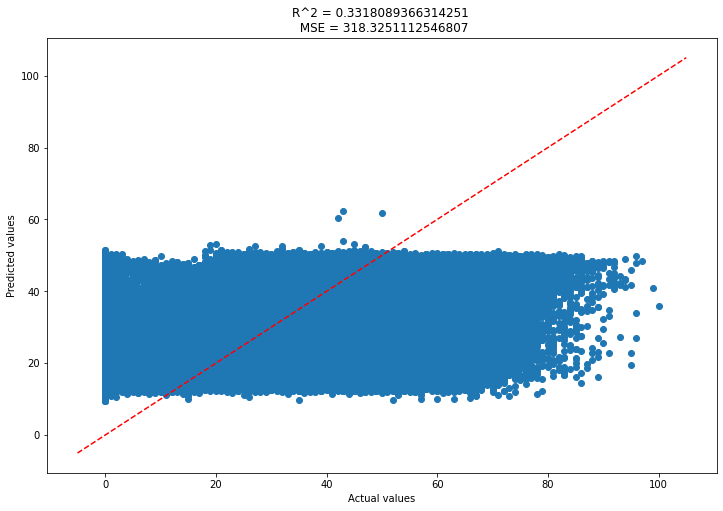

In [33]:
#creating model
summarize_model(lr_base, X_base, y)

###based on popularity 70%+


In [34]:
spotify_df['popularity_over_70'] = spotify_df['popularity'] > 70
spotify_df['popularity_over_70'] = spotify_df['popularity_over_70'].astype(int)

In [35]:
spotify_df['popularity_over_70'].value_counts()

0    166388
1      4265
Name: popularity_over_70, dtype: int64

Coefs: [-3.86275898e-02  6.60627621e-02 -2.21931158e-08  5.29955047e-06]
Intercept: 0.013392034174909246


array([-0.02413701,  0.03553838, -0.01257368, ...,  0.04717138,
        0.05025006,  0.06114058])

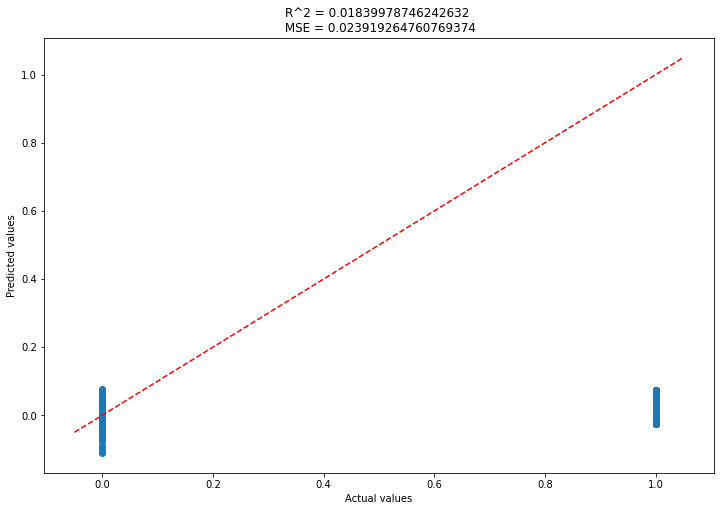

In [36]:
lr5 = LinearRegression()

lr5.fit(X_base, spotify_df['popularity_over_70'])

summarize_model(lr5, X_base, spotify_df['popularity_over_70'])
